<a href="https://colab.research.google.com/github/hayari/GoMyCodeML/blob/master/CP2_Deep_Feed_Forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import initializers,regularizers
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import normalize, to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("bank.csv")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Data Preprocessing

In [6]:
numerical="age	balance	day	duration	campaign	pdays	previous".split()
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
categorical=[col for col in data.columns.to_list() if col not in numerical ]
categorical.remove('deposit')
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [8]:
X_train, X_test, y_train,y_test = train_test_split(data[numerical+categorical], data['deposit'], test_size = 0.2,random_state=100)
X_train, X_valid, y_train,y_valid = train_test_split(X_train, y_train, test_size = 0.2,random_state=100)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(7143, 16)
(1786, 16)
(2233, 16)


In [9]:
#1- normalize numerical data
scaler=StandardScaler()
scaler.fit(X_train[numerical])
X_train_num=scaler.transform(X_train[numerical])
X_valid_num=scaler.transform(X_valid[numerical])
X_test_num=scaler.transform(X_test[numerical])

In [10]:
#2- encode categorical data
onehotx=OneHotEncoder(drop='first',sparse=False)
onehotx.fit(X_train[categorical])
X_train_cat=onehotx.transform(X_train[categorical])
X_valid_cat=onehotx.transform(X_valid[categorical])
X_test_cat=onehotx.transform(X_test[categorical])


y_train=np.where(y_train=='yes',1,0)
y_valid=np.where(y_valid=='yes',1,0)
y_test=np.where(y_test=='yes',1,0)

In [11]:
# concatenate data

X_train=np.concatenate((X_train_num,X_train_cat),axis=1)

X_valid=np.concatenate((X_valid_num,X_valid_cat),axis=1)
X_test=np.concatenate((X_test_num,X_test_cat),axis=1)

# Model construction
## Logistic Regression

In [12]:
logreg = LogisticRegression(random_state=100).fit(X_train, y_train)

print("Train Accuracy={:.2f}".format(logreg.score(X_train,y_train)))
print("Validation Accuracy={:.2f}".format(logreg.score(X_valid,y_valid)))
print("Test Accuracy={:.2f}".format(logreg.score(X_test,y_test)))

Train Accuracy=0.82
Validation Accuracy=0.83
Test Accuracy=0.83


## ANN Model

In [13]:
# creating a model
initializer = tf.keras.initializers.he_uniform()
kernelregulizer = regularizers.l2(l=0.0001)
activityregulizer = None
dropout_rate=0.5
model= Sequential([
   Dense(512, input_dim = 42, activation='relu',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer),
   Dropout(dropout_rate),  
   Dense(512, activation='relu',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer),
   Dropout(dropout_rate), 
   Dense(512, activation='relu',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer),
   Dropout(dropout_rate), 
   Dense(512, activation='relu',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer),
   Dropout(dropout_rate), 
   Dense(1, activation='sigmoid',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer) ])

In [14]:
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])
#print(model.get_weights())

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs= 100,verbose=1)


Epoch 1/100
224/224 [==============================] - 3s 14ms/step - loss: 2.1703 - accuracy: 0.6056 - val_loss: 0.8632 - val_accuracy: 0.7912
Epoch 2/100
224/224 [==============================] - 3s 13ms/step - loss: 1.2255 - accuracy: 0.6688 - val_loss: 0.9183 - val_accuracy: 0.7480
Epoch 3/100
224/224 [==============================] - 3s 13ms/step - loss: 1.0388 - accuracy: 0.7064 - val_loss: 0.8620 - val_accuracy: 0.7962
Epoch 4/100
224/224 [==============================] - 3s 14ms/step - loss: 0.9534 - accuracy: 0.7311 - val_loss: 0.8457 - val_accuracy: 0.8052
Epoch 5/100
224/224 [==============================] - 3s 14ms/step - loss: 0.9234 - accuracy: 0.7511 - val_loss: 0.8628 - val_accuracy: 0.7940
Epoch 6/100
224/224 [==============================] - 3s 14ms/step - loss: 0.8874 - accuracy: 0.7735 - val_loss: 0.8226 - val_accuracy: 0.8152
Epoch 7/100
224/224 [==============================] - 3s 13ms/step - loss: 0.8651 - accuracy: 0.7823 - val_loss: 0.8026 - val_accuracy:

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               22016     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2

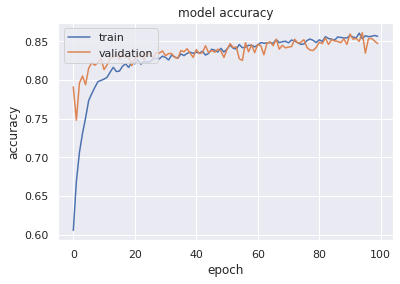

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

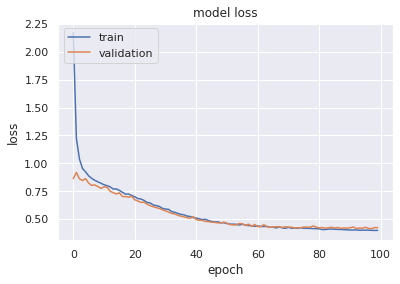

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
model.evaluate(
  X_test,
  y_test)

70/70 [==============================] - 0s 4ms/step - loss: 0.4135 - accuracy: 0.8513


[0.413514107465744, 0.8513211011886597]